<center>

# Product Performance Analysis

This notebook evaluates product and category performance to understand revenue structure, volume dynamics, and portfolio concentration

</center>

## 1. Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FIG_WIDTH = 10
FIG_HEIGHT = 6

## 2. Data Loading

In [2]:
orders = pd.read_csv("../data/raw/olist_orders_dataset.csv")
order_items = pd.read_csv("../data/raw/olist_order_items_dataset.csv")
products = pd.read_csv("../data/raw/olist_products_dataset.csv")
category_translation = pd.read_csv("../data/raw/product_category_name_translation.csv")

## 3. Data Preparation

In [3]:
orders["order_purchase_timestamp"] = pd.to_datetime(
    orders["order_purchase_timestamp"]
)

delivered_orders = orders[orders["order_status"] == "delivered"]

df = delivered_orders.merge(
    order_items,
    on="order_id",
    how="left"
)

df["revenue"] = df["price"] + df["freight_value"]

df = df.merge(
    products[["product_id", "product_category_name"]],
    on="product_id",
    how="left"
)

df = df.merge(
    category_translation,
    on="product_category_name",
    how="left"
)

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,utilidades_domesticas,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46,perfumaria,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12,automotivo,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,72.20,pet_shop,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,28.62,papelaria,stationery


## 4. Product Performance Overview


#### 4.1 Top Products by Revenue

##### 4.1.1 Revenue by Product

In [ ]:
category_revenue = (
    df
    .groupby("product_category_name_english")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

category_revenue["product_category_name_english"] = (
    category_revenue["product_category_name_english"]
    .fillna("Unknown")
)

category_revenue["revenue"] = category_revenue["revenue"].round(2)

top10_category_revenue = category_revenue.head(10)

top10_category_revenue

,product_category_name_english,revenue
0,health_beauty,1412089.53
1,watches_gifts,1264333.12
2,bed_bath_table,1225209.26
3,sports_leisure,1118256.91
4,computers_accessories,1032723.77
5,furniture_decor,880329.92
6,housewares,758392.25
7,cool_stuff,691680.89
8,auto,669454.75
9,garden_tools,567145.68


##### 4.1.2 Top 10 Products by Revenue - Visualization

This section identifies top-performing products based on revenue and order volume.

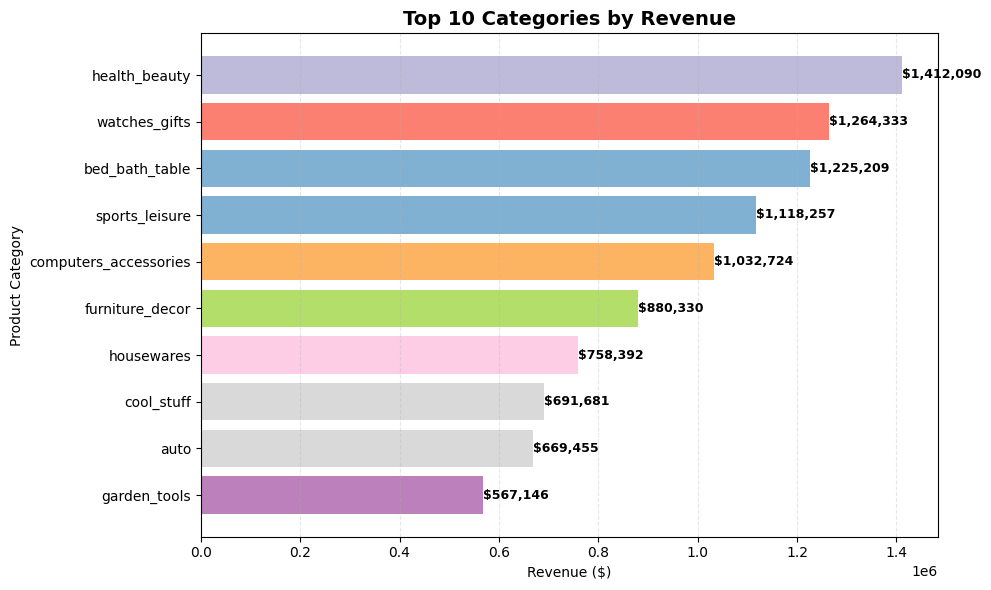

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.close("all")

COLOR_PALETTE = plt.cm.Set3(
    np.linspace(0.2, 0.8, len(top10_category_revenue))
)

plt.figure(figsize=(10,6))

bars = plt.barh(
    top10_category_revenue.iloc[:, 0],
    top10_category_revenue["revenue"],
    color=COLOR_PALETTE
)

plt.gca().invert_yaxis()

plt.title("Top 10 Categories by Revenue", fontsize=14, fontweight="bold")
plt.xlabel("Revenue ($)")
plt.ylabel("Product Category")

plt.grid(axis="x", alpha=0.3, linestyle="--")

for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height()/2,
        f"${width:,.0f}",
        va='center',
        ha='left',
        fontsize=9,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

#### 4.2 Revenue vs Order Volume by Category

##### 4.2.1 Order Volume by Category

In [7]:
category_orders = (
    df
    .groupby("product_category_name_english")["order_id"]
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)

category_orders.rename(columns={"order_id": "order_count"}, inplace=True)

top10_category_orders = category_orders.head(10)

top10_category_orders

,product_category_name_english,order_count
0,bed_bath_table,9272
1,health_beauty,8647
2,sports_leisure,7530
3,computers_accessories,6530
4,furniture_decor,6307
5,housewares,5743
6,watches_gifts,5495
7,telephony,4093
8,auto,3810
9,toys,3804


##### 4.2.2 Revenue vs Order Comparison Table

In [8]:
category_revenue = (
    df
    .groupby("product_category_name_english")["revenue"]
    .sum()
    .reset_index()
)


category_orders = (
    df
    .groupby("product_category_name_english")["order_id"]
    .nunique()
    .reset_index()
    .rename(columns={"order_id": "order_count"})
)


category_performance = category_revenue.merge(
    category_orders,
    on="product_category_name_english",
    how="left"
)


category_performance["revenue_per_order"] = (
    category_performance["revenue"] / category_performance["order_count"]
)


category_performance = category_performance.sort_values(
    by="revenue",
    ascending=False
)


category_performance["revenue"] = category_performance["revenue"].round(2)
category_performance["revenue_per_order"] = category_performance["revenue_per_order"].round(2)

category_performance.head(10)

,product_category_name_english,revenue,order_count,revenue_per_order
43,health_beauty,1412089.53,8647,163.30
70,watches_gifts,1264333.12,5495,230.09
7,bed_bath_table,1225209.26,9272,132.14
65,sports_leisure,1118256.91,7530,148.51
15,computers_accessories,1032723.77,6530,158.15
39,furniture_decor,880329.92,6307,139.58
49,housewares,758392.25,5743,132.06
20,cool_stuff,691680.89,3559,194.35
5,auto,669454.75,3810,175.71
42,garden_tools,567145.68,3448,164.49


##### 4.2.3 Revenue per Order Visualization

The category watches_gifts generates the highest revenue per order, indicating premium pricing and higher-value products despite lower order volume.

Bed_bath_table leads in order count but has one of the lowest revenue per order values, suggesting a volume-driven category with lower-priced items.

Health_beauty stands out as a balanced performer, combining high order volume with strong revenue contribution.

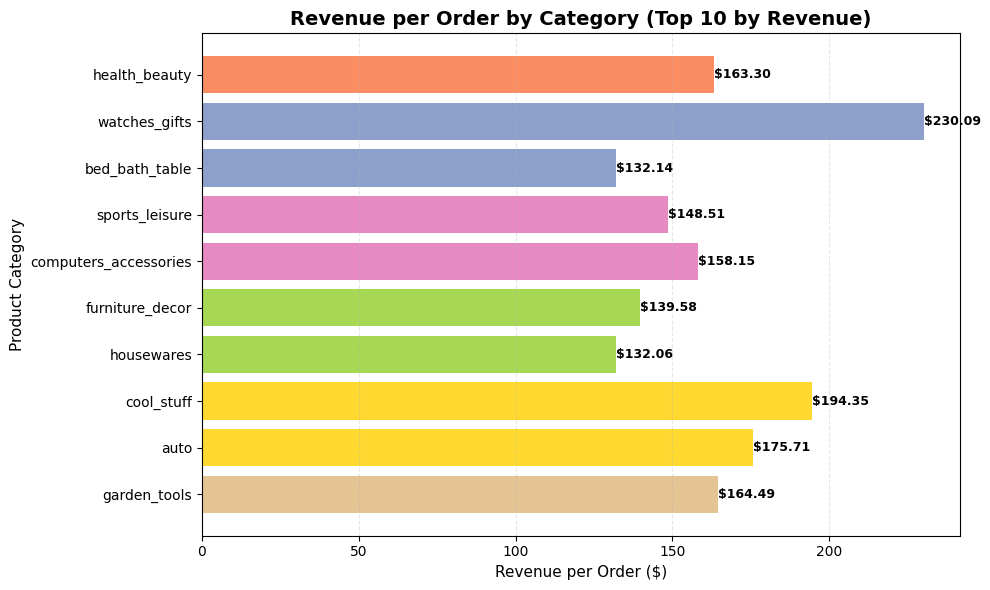

In [9]:
import numpy as np
import matplotlib.pyplot as plt

top10_perf = category_performance.head(10)

COLOR_PALETTE = plt.cm.Set2(
    np.linspace(0.2, 0.8, len(top10_perf))
)

plt.figure(figsize=(10,6))

bars = plt.barh(
    top10_perf["product_category_name_english"],
    top10_perf["revenue_per_order"],
    color=COLOR_PALETTE
)

plt.gca().invert_yaxis()

plt.title("Revenue per Order by Category (Top 10 by Revenue)", 
          fontsize=14, fontweight="bold")
plt.xlabel("Revenue per Order ($)", fontsize=11)
plt.ylabel("Product Category", fontsize=11)

plt.grid(axis="x", alpha=0.3, linestyle="--")

for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height()/2,
        f"${width:,.2f}",
        va="center",
        ha="left",
        fontsize=9,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()

#### 4.3 Revenue Concentration by Category

##### 4.3.1 Category Revenue Share (%)

In [10]:
total_revenue = category_performance["revenue"].sum()


category_performance["revenue_share_%"] = (
    category_performance["revenue"] / total_revenue * 100
).round(2)

category_performance.head(10)

,product_category_name_english,revenue,order_count,revenue_per_order,revenue_share_%
43,health_beauty,1412089.53,8647,163.30,9.28
70,watches_gifts,1264333.12,5495,230.09,8.31
7,bed_bath_table,1225209.26,9272,132.14,8.05
65,sports_leisure,1118256.91,7530,148.51,7.35
15,computers_accessories,1032723.77,6530,158.15,6.79
39,furniture_decor,880329.92,6307,139.58,5.79
49,housewares,758392.25,5743,132.06,4.98
20,cool_stuff,691680.89,3559,194.35,4.55
5,auto,669454.75,3810,175.71,4.40
42,garden_tools,567145.68,3448,164.49,3.73


##### 4.3.2 Top 3 / Top 5 Revenue Contribution

Revenue concentration analysis shows that the top 3 categories generate 25.64% of total revenue, while the top 5 generate 39.78%.

This indicates that revenue is relatively well distributed across categories and not heavily dependent on a small number of product groups.

In [11]:
top3_share = category_performance.head(3)["revenue_share_%"].sum()

top5_share = category_performance.head(5)["revenue_share_%"].sum()

print(f"Top 3 categories generate: {top3_share:.2f}% of total revenue")
print(f"Top 5 categories generate: {top5_share:.2f}% of total revenue")

Top 3 categories generate: 25.64% of total revenue
Top 5 categories generate: 39.78% of total revenue


#### 4.4 Product-Level Revenue Concentration

##### 4.4.1 Revenue Share by Product

Product-level revenue concentration analysis shows that the top 10 products generate only 3.21% of total revenue, while the top 50 products account for 9.15%.

This indicates that revenue is highly diversified across a wide range of products, reducing dependency on individual items.

In [12]:
product_revenue = (
    df
    .groupby("product_id")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

total_product_revenue = product_revenue["revenue"].sum()

product_revenue["revenue_share_%"] = (
    product_revenue["revenue"] / total_product_revenue * 100
).round(4)

product_revenue.head(10)

,product_id,revenue,revenue_share_%
0,bb50f2e236e5eea0100680137654686c,67258.03,0.4362
1,d1c427060a0f73f6b889a5c7c61f2ac4,58957.31,0.3823
2,6cdd53843498f92890544667809f1595,57933.73,0.3757
3,99a4788cb24856965c36a24e339b6058,49907.50,0.3237
4,3dd2a17168ec895c781a9191c1e95ad7,47876.06,0.3105
5,d6160fb7873f184099d9bc95e30376af,47314.18,0.3068
6,aca2eb7d00ea1a7b8ebd4e68314663af,44197.75,0.2866
7,5f504b3a1c75b73d6151be81eb05bdc9,41725.81,0.2706
8,25c38557cf793876c5abdd5931f922db,40311.95,0.2614
9,53b36df67ebb7c41585e8d54d6772e08,39713.49,0.2575


##### 4.4.2 Top 10 / 50 Revenue Contribution

In [14]:
# Top 10 revenue share
top10_product_share = product_revenue.head(10)["revenue_share_%"].sum()

# Top 50 revenue share
top50_product_share = product_revenue.head(50)["revenue_share_%"].sum()

print(f"Top 10 products generate: {top10_product_share:.2f}% of total revenue")
print(f"Top 50 products generate: {top50_product_share:.2f}% of total revenue")

Top 10 products generate: 3.21% of total revenue
Top 50 products generate: 9.15% of total revenue


#### 4.5 Price Distribution Analysis

##### 4.5.1 Basic Price Statics

Price distribution analysis shows that the average price ($119.98) is significantly higher than the median price ($74.90), indicating a right-skewed distribution.

This suggests the presence of high-priced outliers that pull the average upward.

The wide standard deviation further confirms that product prices vary significantly across the platform.

In [15]:
price_stats = df["price"].describe().round(2)
price_stats

count    110197.00
mean        119.98
std         182.30
min           0.85
25%          39.90
50%          74.90
75%         134.17
max        6735.00
Name: price, dtype: float64

##### 4.5.2 Price Distribution - Histogram

The histogram shows that most products are concentrated in the $0–100 price range, particularly between $20 and $80.

This indicates that the platform primarily operates in the low-to-mid price segment.

Higher-priced products exist but represent a small portion of total listings, forming a long right tail in the distribution.

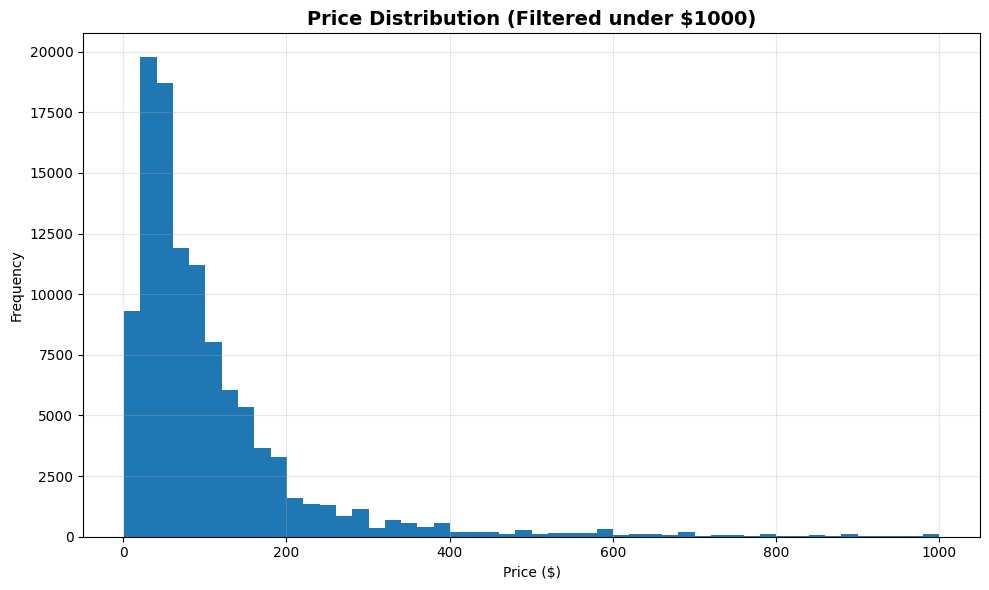

In [ ]:
filtered_prices = df[df["price"] < 1000]["price"]

plt.figure(figsize=(10,6))

plt.hist(filtered_prices, bins=50)

plt.title("Price Distribution (Filtered under $1000)", 
          fontsize=14, fontweight="bold")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")

plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### 4.6 Average Price by Category

##### 4.6.1 Calculate Average Price

Average price analysis shows that categories such as computers and home appliances operate in a high-price segment.

Computers have the highest average price ($1098.92), indicating a premium category.

This explains why some categories generate high revenue despite relatively lower order volumes.

In [ ]:
avg_price_by_category = (
    df
    .groupby("product_category_name_english")["price"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

avg_price_by_category["price"] = avg_price_by_category["price"].round(2)

avg_price_by_category.head(10)

,product_category_name_english,price
0,computers,1098.92
1,small_appliances_home_oven_and_coffee,638.21
2,home_appliances_2,467.33
3,agro_industry_and_commerce,342.55
4,musical_instruments,283.13
5,small_appliances,277.74
6,fixed_telephony,216.92
7,construction_tools_safety,211.88
8,watches_gifts,199.04
9,furniture_bedroom,184.97


##### 4.6.2 Average Price by Category - Visualization

The average price analysis shows that the computers category operates in a significantly higher price segment compared to others.

However, high average price does not necessarily translate into the highest revenue, as revenue depends on both price and order volume.

Categories such as watches_gifts show consistent behavior between average price and revenue per order metrics.

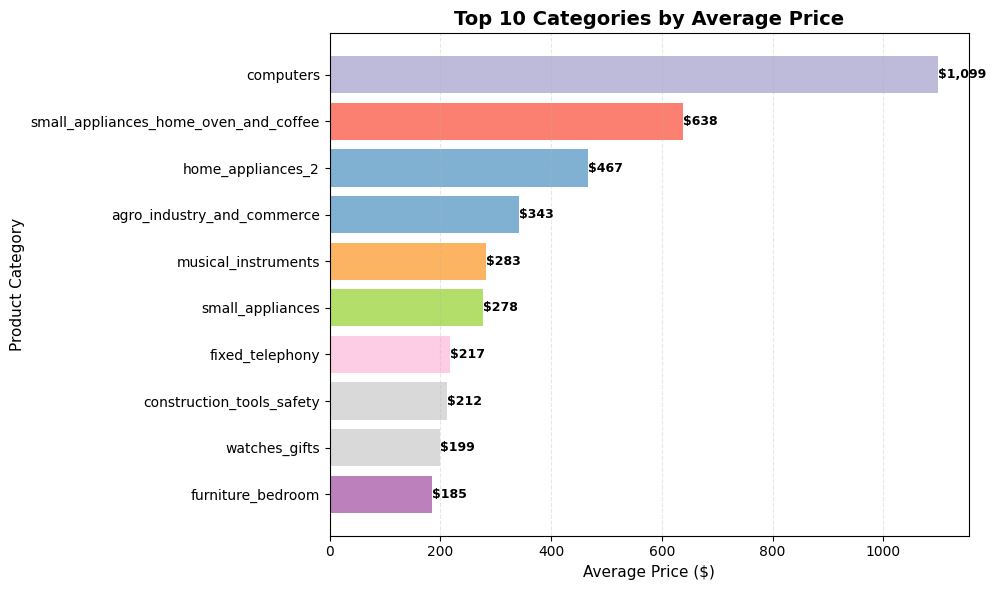

In [19]:
import numpy as np
import matplotlib.pyplot as plt

top10_avg_price = avg_price_by_category.head(10)

COLOR_PALETTE = plt.cm.Set3(
    np.linspace(0.2, 0.8, len(top10_avg_price))
)

plt.figure(figsize=(10,6))

bars = plt.barh(
    top10_avg_price["product_category_name_english"],
    top10_avg_price["price"],
    color=COLOR_PALETTE
)

plt.gca().invert_yaxis()

plt.title("Top 10 Categories by Average Price", 
          fontsize=14, fontweight="bold")
plt.xlabel("Average Price ($)", fontsize=11)
plt.ylabel("Product Category", fontsize=11)

plt.grid(axis="x", alpha=0.3, linestyle="--")

for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height()/2,
        f"${width:,.0f}",
        va="center",
        ha="left",
        fontsize=9,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()

#### 4.7 Price vs Revenue Relationship

##### 4.7.1 Correlation Analysis

The correlation between average price and total revenue at category level is approximately 0.01.

This indicates that there is almost no linear relationship between price and revenue.

High-priced categories do not necessarily generate higher revenue. 
Revenue performance appears to be more volume-driven rather than price-driven.

In [20]:
category_price = (
    df
    .groupby("product_category_name_english")["price"]
    .mean()
)

category_revenue = (
    df
    .groupby("product_category_name_english")["revenue"]
    .sum()
)

price_revenue_df = (
    pd.concat([category_price, category_revenue], axis=1)
    .reset_index()
)

price_revenue_df.columns = [
    "product_category_name_english",
    "avg_price",
    "total_revenue"
]

correlation = price_revenue_df["avg_price"].corr(
    price_revenue_df["total_revenue"]
)

correlation

np.float64(0.01241997981956704)

##### 4.7.2 Scatter Plot (Price vs Revenue

The scatter plot confirms that there is no strong relationship between average price and total revenue at the category level.

High-priced categories do not dominate revenue performance. 
Instead, categories with moderate pricing and higher order volume generate stronger total revenue.

This suggests that revenue performance is more volume-driven rather than price-driven.)

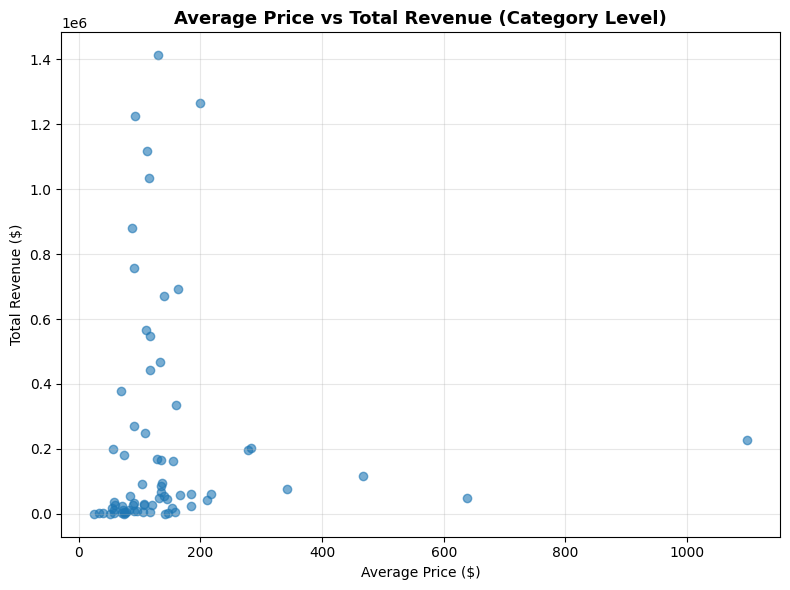

In [21]:
plt.figure(figsize=(8,6))

plt.scatter(
    price_revenue_df["avg_price"],
    price_revenue_df["total_revenue"],
    alpha=0.6
)

plt.title("Average Price vs Total Revenue (Category Level)",
          fontsize=13, fontweight="bold")
plt.xlabel("Average Price ($)")
plt.ylabel("Total Revenue ($)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### 4.8 Final Product Performance Insights

This section summarizes the key findings from the product performance analysis.

##### 1. Revenue Concentration

Revenue is highly concentrated within a limited number of product categories. 

- Top 3 categories generate approximately 25.64% of total revenue.
- Top 5 categories generate approximately 39.78% of total revenue.

This indicates a moderate level of revenue concentration across categories.

---

##### 2. Volume-Driven Revenue Model

Correlation analysis between average price and total revenue (~0.01) shows that price level alone does not determine revenue performance.

Categories with moderate pricing and high order volume tend to generate stronger revenue than premium-priced categories.

Revenue in this marketplace appears to be volume-driven rather than price-driven.

---

##### 3. Revenue per Order Differences

Some categories such as watches_gifts demonstrate higher revenue per order, indicating stronger basket value.

However, high revenue per order does not automatically translate into highest total revenue without sufficient volume.

---

##### 4. Price Distribution Characteristics

Price distribution is right-skewed:

- Most products are priced under $200
- A small number of high-priced outliers increase the mean price
- Median price is significantly lower than the mean

This suggests a mass-market pricing strategy with limited premium segments.

---

##### 5. Strategic Implication

From a business perspective:

- Growth strategies should focus on scaling high-volume categories.
- Premium categories may require targeted positioning rather than volume expansion.
- Product portfolio management should balance price level and order volume dynamics.